# Bosques aleatorios

El objetivo de este ejercicio es explorar algunos atributos disponibles en bosque aleatorio de scikit-learn.

El dataSet en estudio tiene guarda información acerca de las características de los pingüinos.

Nuestro objetivo es predecir la masa corporal en función de la longitud de las aletas

In [46]:
# importamos librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree

In [47]:
#leemos el dataset ("penguins.csv")
penguins = pd.read_csv("penguins.csv")
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [53]:
#Dividimos el dataset en datos para el estudio, es decir datos de características(data_X)

feature_name = np.array(penguins["flipper_length_mm"].values)
feature_name = feature_name[~np.isnan(feature_name)].reshape(-1, 1)
feature_name

array([[181.],
       [186.],
       [195.],
       [193.],
       [190.],
       [181.],
       [195.],
       [193.],
       [190.],
       [186.],
       [180.],
       [182.],
       [191.],
       [198.],
       [185.],
       [195.],
       [197.],
       [184.],
       [194.],
       [174.],
       [180.],
       [189.],
       [185.],
       [180.],
       [187.],
       [183.],
       [187.],
       [172.],
       [180.],
       [178.],
       [178.],
       [188.],
       [184.],
       [195.],
       [196.],
       [190.],
       [180.],
       [181.],
       [184.],
       [182.],
       [195.],
       [186.],
       [196.],
       [185.],
       [190.],
       [182.],
       [179.],
       [190.],
       [191.],
       [186.],
       [188.],
       [190.],
       [200.],
       [187.],
       [191.],
       [186.],
       [193.],
       [181.],
       [194.],
       [185.],
       [195.],
       [185.],
       [192.],
       [184.],
       [192.],
       [195.],
       [18

In [54]:
#y datos con la clase(target)
target_name = np.array(penguins["body_mass_g"].values)
target_name = target_name[~np.isnan(target_name)].reshape(-1, 1)
target_name

array([[3750.],
       [3800.],
       [3250.],
       [3450.],
       [3650.],
       [3625.],
       [4675.],
       [3475.],
       [4250.],
       [3300.],
       [3700.],
       [3200.],
       [3800.],
       [4400.],
       [3700.],
       [3450.],
       [4500.],
       [3325.],
       [4200.],
       [3400.],
       [3600.],
       [3800.],
       [3950.],
       [3800.],
       [3800.],
       [3550.],
       [3200.],
       [3150.],
       [3950.],
       [3250.],
       [3900.],
       [3300.],
       [3900.],
       [3325.],
       [4150.],
       [3950.],
       [3550.],
       [3300.],
       [4650.],
       [3150.],
       [3900.],
       [3100.],
       [4400.],
       [3000.],
       [4600.],
       [3425.],
       [2975.],
       [3450.],
       [4150.],
       [3500.],
       [4300.],
       [3450.],
       [4050.],
       [2900.],
       [3700.],
       [3550.],
       [3800.],
       [2850.],
       [3750.],
       [3150.],
       [4400.],
       [3600.],
       [

In [56]:
#Dividimos en datos de entrenamiento y de test

X_train, X_test, y_train, y_test = model_selection.train_test_split(feature_name,target_name, random_state=1)

In [57]:
#Crea un bosque aleatorio que contenga tres árboles. 
bosque = RandomForestRegressor(n_estimators=3,
                            max_samples=2/3)

In [59]:
# Entrena al bosque y comprueba el rendimiento .
bosque.fit(X_train, y_train.ravel())

RandomForestRegressor(max_samples=0.6666666666666666, n_estimators=3)

In [60]:
#Evalúalo con la exactitud
print(bosque.score(X_train, y_train))

0.8023265981623253


In [66]:
#Vamos a hacer predicciones, para ello vamos a generar datos de prueba
# Tienes que generar un nuevo dataFrame para la longitud de la aleta en el intervalo entre 170 mm y 230 mm que tenga 300 muestras
data_range = pd.DataFrame(np.linspace(170, 235, num=300), columns=penguins[["flipper_length_mm"]].columns)
data_range = data_range.to_numpy()
data_range

array([[170.        ],
       [170.2173913 ],
       [170.43478261],
       [170.65217391],
       [170.86956522],
       [171.08695652],
       [171.30434783],
       [171.52173913],
       [171.73913043],
       [171.95652174],
       [172.17391304],
       [172.39130435],
       [172.60869565],
       [172.82608696],
       [173.04347826],
       [173.26086957],
       [173.47826087],
       [173.69565217],
       [173.91304348],
       [174.13043478],
       [174.34782609],
       [174.56521739],
       [174.7826087 ],
       [175.        ],
       [175.2173913 ],
       [175.43478261],
       [175.65217391],
       [175.86956522],
       [176.08695652],
       [176.30434783],
       [176.52173913],
       [176.73913043],
       [176.95652174],
       [177.17391304],
       [177.39130435],
       [177.60869565],
       [177.82608696],
       [178.04347826],
       [178.26086957],
       [178.47826087],
       [178.69565217],
       [178.91304348],
       [179.13043478],
       [179

In [71]:
bosque.predict(data_range)

array([3488.88888889, 3488.88888889, 3488.88888889, 3488.88888889,
       3488.88888889, 3488.88888889, 3488.88888889, 3488.88888889,
       3488.88888889, 3488.88888889, 3488.88888889, 3488.88888889,
       3488.88888889, 3488.88888889, 3488.88888889, 3488.88888889,
       3488.88888889, 3488.88888889, 3488.88888889, 3488.88888889,
       3488.88888889, 3488.88888889, 3488.88888889, 3488.88888889,
       3488.88888889, 3488.88888889, 3488.88888889, 3488.88888889,
       3488.88888889, 3488.88888889, 3488.88888889, 3488.88888889,
       3488.88888889, 3380.55555556, 3380.55555556, 3380.55555556,
       3380.55555556, 3380.55555556, 3380.55555556, 3380.55555556,
       3091.66666667, 3091.66666667, 3227.77777778, 3227.77777778,
       3713.88888889, 3713.88888889, 3713.88888889, 3713.88888889,
       3713.88888889, 3464.58333333, 3464.58333333, 3464.58333333,
       3464.58333333, 3379.16666667, 3379.16666667, 3379.16666667,
       3379.16666667, 3379.16666667, 3312.5       , 3312.5    

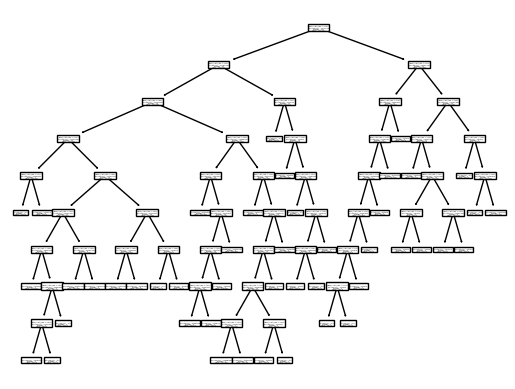

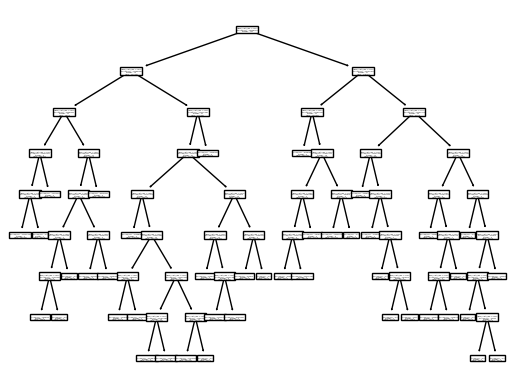

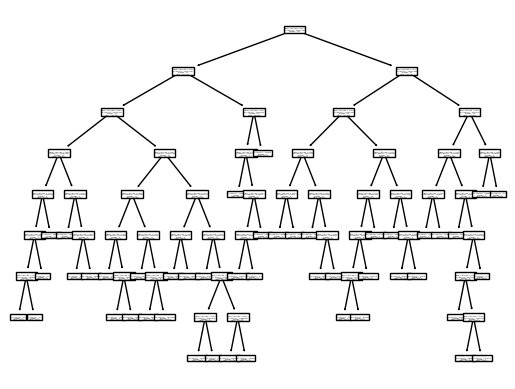

In [73]:
# Pintamos los árboles
for arbol in bosque.estimators_:
    tree.plot_tree(arbol, feature_names=penguins[["flipper_length_mm"]].columns)
    plt.show()
    

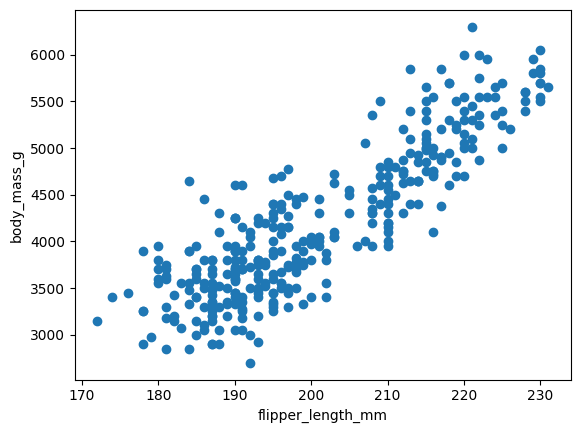

In [74]:
#¿Recordarías cómo pintar un diagrama de puntos usando x=feature_name e  y=target_name,?
plt.scatter(feature_name, target_name) 

plt.ylabel("body_mass_g")
plt.xlabel("flipper_length_mm")
plt.show()